In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/isic-2024-challenge/sample_submission.csv
/kaggle/input/isic-2024-challenge/train-metadata.csv
/kaggle/input/isic-2024-challenge/test-metadata.csv
/kaggle/input/isic-2024-challenge/test-image.hdf5
/kaggle/input/isic-2024-challenge/train-image.hdf5


KeyboardInterrupt: 

In [2]:
import pandas as pd
import numpy as np

In [3]:
from scipy.stats import pointbiserialr
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df18= pd.read_csv('/kaggle/input/isic-2018-jpg-224x224-resized/train-metadata.csv')

In [10]:
 df['target'].unique()

array([0, 1])

In [11]:
df18[df18['target']== 1]

,Unnamed: 0,isic_id,patient_id,target
2,2,ISIC_0034246,HAM_0000002,1.0
6,6,ISIC_0034162,HAM_0000006,1.0
22,22,ISIC_0031377,HAM_0000022,1.0
40,40,ISIC_0027190,HAM_0000040,1.0
42,42,ISIC_0034048,HAM_0000042,1.0
...,...,...,...,...
8946,8946,ISIC_0036029,dummy_1476,1.0
8951,8951,ISIC_0036034,dummy_1481,1.0
8968,8968,ISIC_0036051,dummy_1498,1.0
8973,8973,ISIC_0036056,dummy_1503,1.0


# Data 2019 data

In [12]:
df19= pd.read_csv('/kaggle/input/isic-2019-jpg-256x256-resized/train-metadata.csv')

In [13]:
df19

,Unnamed: 0,isic_id,patient_id,target
0,0,ISIC_0000000,dummy_0,0
1,1,ISIC_0000001,dummy_1,0
2,2,ISIC_0000002,dummy_2,1
3,3,ISIC_0000003,dummy_3,0
4,4,ISIC_0000004,dummy_4,1
...,...,...,...,...
25326,25326,ISIC_0073247,dummy_25326,0
25327,25327,ISIC_0073248,dummy_25327,0
25328,25328,ISIC_0073249,dummy_25328,1
25329,25329,ISIC_0073251,dummy_25329,0


# Dataset 2020

In [16]:
df20= pd.read_csv('/kaggle/input/isic-2020-jpg-224x224-resized/train-metadata.csv')

In [17]:
df20

,Unnamed: 0,isic_id,patient_id,target
0,0,ISIC_2637011,IP_7279968,0
1,1,ISIC_0015719,IP_3075186,0
2,2,ISIC_0052212,IP_2842074,0
3,3,ISIC_0068279,IP_6890425,0
4,4,ISIC_0074268,IP_8723313,0
...,...,...,...,...
33121,33121,ISIC_9999134,IP_6526534,0
33122,33122,ISIC_9999320,IP_3650745,0
33123,33123,ISIC_9999515,IP_2026598,0
33124,33124,ISIC_9999666,IP_7702038,0


In [4]:
df= pd.read_csv('/kaggle/input/isic-2024-challenge/train-metadata.csv')

/tmp/ipykernel_33/3771652496.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv('/kaggle/input/isic-2024-challenge/train-metadata.csv')


In [15]:
test_df = pd.read_csv('/kaggle/input/isic-2024-challenge/test-metadata.csv')

In [10]:
df.value_counts()


Series([], Name: count, dtype: int64)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401059 entries, 0 to 401058
Data columns (total 55 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   isic_id                       401059 non-null  object 
 1   target                        401059 non-null  int64  
 2   patient_id                    401059 non-null  object 
 3   age_approx                    398261 non-null  float64
 4   sex                           389542 non-null  object 
 5   anatom_site_general           395303 non-null  object 
 6   clin_size_long_diam_mm        401059 non-null  float64
 7   image_type                    401059 non-null  object 
 8   tbp_tile_type                 401059 non-null  object 
 9   tbp_lv_A                      401059 non-null  float64
 10  tbp_lv_Aext                   401059 non-null  float64
 11  tbp_lv_B                      401059 non-null  float64
 12  tbp_lv_Bext                   401059 non-nul

# Find possible values and their for descrite and continuous variable

In [14]:
def print_numerical_var_details(df):
    # Identify integer and float columns
    numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

    # Calculate the range (min and max) for each numeric column
    for col in numeric_cols:
        min_value = df[col].min()
        max_value = df[col].max()
        print(f"Column: {col}")
        print(f"  Type: {df[col].dtype}")
        print(f"  Min: {min_value}")
        print(f"  Max: {max_value}")
        print(f"  Range: {max_value - min_value}\n")

# Categorical variables and their unique values

In [13]:
def print_categorical_details(df):
    object_cols = df.select_dtypes(include=['object']).columns

    # Step 2: Print unique values for each object-type column
    for col in object_cols:
        unique_values = df[col].unique()
        print(f"Column: {col}")
        print(f"  Unique values: {unique_values}\n")

In [29]:
print_categorical_details(test_df)

Column: isic_id
  Unique values: ['ISIC_0015657' 'ISIC_0015729' 'ISIC_0015740']

Column: patient_id
  Unique values: ['IP_6074337' 'IP_1664139' 'IP_7142616']

Column: sex
  Unique values: ['male' 'female']

Column: anatom_site_general
  Unique values: ['posterior torso' 'lower extremity']

Column: image_type
  Unique values: ['TBP tile: close-up']

Column: tbp_tile_type
  Unique values: ['3D: XP']

Column: tbp_lv_location
  Unique values: ['Torso Back Top Third' 'Left Leg - Upper']

Column: tbp_lv_location_simple
  Unique values: ['Torso Back' 'Left Leg']

Column: attribution
  Unique values: ['Memorial Sloan Kettering Cancer Center'
 'Frazer Institute, The University of Queensland, Dermatology Research Centre'
 'FNQH Cairns']

Column: copyright_license
  Unique values: ['CC-BY']



In [17]:
print_numerical_var_details(test_df)

Column: age_approx
  Type: float64
  Min: 35.0
  Max: 65.0
  Range: 30.0

Column: clin_size_long_diam_mm
  Type: float64
  Min: 2.52
  Max: 3.16
  Range: 0.6400000000000001

Column: tbp_lv_A
  Type: float64
  Min: 16.6486699011474
  Max: 24.25384
  Range: 7.6051700988526

Column: tbp_lv_Aext
  Type: float64
  Min: 9.65796440333733
  Max: 20.00727
  Range: 10.349305596662669

Column: tbp_lv_B
  Type: float64
  Min: 28.38412
  Max: 31.3175200572056
  Range: 2.933400057205599

Column: tbp_lv_Bext
  Type: float64
  Min: 27.04364
  Max: 28.38424
  Range: 1.3405999999999985

Column: tbp_lv_C
  Type: float64
  Min: 35.4678061347308
  Max: 38.9395
  Range: 3.471693865269202

Column: tbp_lv_Cext
  Type: float64
  Min: 29.169579498482
  Max: 34.68666
  Range: 5.517080501518002

Column: tbp_lv_H
  Type: float64
  Min: 51.22096
  Max: 62.0044942415342
  Range: 10.783534241534205

Column: tbp_lv_Hext
  Type: float64
  Min: 53.50543
  Max: 70.6646189342357
  Range: 17.159188934235708

Column: tbp_lv

In [59]:
print_categorical_details(df)

Column: isic_id
  Unique values: ['ISIC_0015670' 'ISIC_0015845' 'ISIC_0015864' ... 'ISIC_9999960'
 'ISIC_9999964' 'ISIC_9999967']

Column: patient_id
  Unique values: ['IP_1235828' 'IP_8170065' 'IP_6724798' ... 'IP_4004571' 'IP_1487179'
 'IP_7696347']

Column: sex
  Unique values: ['male' 'female' nan]

Column: anatom_site_general
  Unique values: ['lower extremity' 'head/neck' 'posterior torso' 'anterior torso'
 'upper extremity' nan]

Column: image_type
  Unique values: ['TBP tile: close-up']

Column: tbp_tile_type
  Unique values: ['3D: white' '3D: XP']

Column: tbp_lv_location
  Unique values: ['Right Leg - Upper' 'Head & Neck' 'Torso Back Top Third'
 'Torso Front Top Half' 'Right Arm - Upper' 'Left Leg - Upper'
 'Torso Front Bottom Half' 'Left Arm - Upper' 'Right Leg'
 'Torso Back Middle Third' 'Right Arm - Lower' 'Right Leg - Lower'
 'Left Leg - Lower' 'Left Arm - Lower' 'Unknown' 'Left Leg'
 'Torso Back Bottom Third' 'Left Arm' 'Right Arm' 'Torso Front'
 'Torso Back']

Column: t

In [60]:
print_numerical_var_details(df)

Column: target
  Type: int64
  Min: 0
  Max: 1
  Range: 1

Column: age_approx
  Type: float64
  Min: 5.0
  Max: 85.0
  Range: 80.0

Column: clin_size_long_diam_mm
  Type: float64
  Min: 1.0
  Max: 28.4
  Range: 27.4

Column: tbp_lv_A
  Type: float64
  Min: -2.48711505714594
  Max: 48.18961
  Range: 50.676725057145944

Column: tbp_lv_Aext
  Type: float64
  Min: -9.080269
  Max: 37.0216804835792
  Range: 46.101949483579205

Column: tbp_lv_B
  Type: float64
  Min: -0.730989470581214
  Max: 54.3069
  Range: 55.03788947058121

Column: tbp_lv_Bext
  Type: float64
  Min: 9.2370662438841
  Max: 48.3727
  Range: 39.1356337561159

Column: tbp_lv_C
  Type: float64
  Min: 3.05422849821613
  Max: 58.76517
  Range: 55.710941501783864

Column: tbp_lv_Cext
  Type: float64
  Min: 11.84652
  Max: 54.3052903958931
  Range: 42.458770395893104

Column: tbp_lv_H
  Type: float64
  Min: -1.57416413949566
  Max: 105.875784308153
  Range: 107.44994844764867

Column: tbp_lv_Hext
  Type: float64
  Min: 28.43649
 

In [21]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 44 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   isic_id                      3 non-null      object 
 1   patient_id                   3 non-null      object 
 2   age_approx                   3 non-null      float64
 3   sex                          3 non-null      object 
 4   anatom_site_general          3 non-null      object 
 5   clin_size_long_diam_mm       3 non-null      float64
 6   image_type                   3 non-null      object 
 7   tbp_tile_type                3 non-null      object 
 8   tbp_lv_A                     3 non-null      float64
 9   tbp_lv_Aext                  3 non-null      float64
 10  tbp_lv_B                     3 non-null      float64
 11  tbp_lv_Bext                  3 non-null      float64
 12  tbp_lv_C                     3 non-null      float64
 13  tbp_lv_Cext             

# Images and their attributes

In [22]:
df.head(5)

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
0,ISIC_0015670,0,IP_1235828,60.0,male,lower extremity,3.04,TBP tile: close-up,3D: white,20.244422,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,97.517282
1,ISIC_0015845,0,IP_8170065,60.0,male,head/neck,1.10,TBP tile: close-up,3D: white,31.712570,...,IL_6727506,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,3.141455
2,ISIC_0015864,0,IP_6724798,60.0,male,posterior torso,3.40,TBP tile: close-up,3D: XP,22.575830,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.804040
3,ISIC_0015902,0,IP_4111386,65.0,male,anterior torso,3.22,TBP tile: close-up,3D: XP,14.242329,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,99.989998
4,ISIC_0024200,0,IP_8313778,55.0,male,anterior torso,2.73,TBP tile: close-up,3D: white,24.725520,...,NaN,Benign,Benign,NaN,NaN,NaN,NaN,NaN,NaN,70.442510


In [30]:
df[df['target'] == 1]

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,...,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
387,ISIC_0082829,1,IP_3249371,80.0,female,anterior torso,9.27,TBP tile: close-up,3D: XP,18.093368,...,IL_7881385,Malignant::Malignant epidermal proliferations:...,Malignant,Malignant epidermal proliferations,Squamous cell carcinoma in situ,NaN,NaN,NaN,NaN,72.211683
935,ISIC_0096034,1,IP_6723298,75.0,male,head/neck,3.88,TBP tile: close-up,3D: white,26.187010,...,IL_5240575,Malignant::Malignant adnexal epithelial prolif...,Malignant,Malignant adnexal epithelial proliferations - ...,Basal cell carcinoma,"Basal cell carcinoma, Nodular",NaN,NaN,NaN,94.559590
1245,ISIC_0104229,1,IP_9057861,80.0,male,anterior torso,6.55,TBP tile: close-up,3D: white,33.480140,...,IL_1702337,Malignant::Malignant adnexal epithelial prolif...,Malignant,Malignant adnexal epithelial proliferations - ...,Basal cell carcinoma,"Basal cell carcinoma, Nodular",NaN,NaN,NaN,66.196170
1846,ISIC_0119495,1,IP_6856511,60.0,male,upper extremity,5.27,TBP tile: close-up,3D: white,25.872050,...,IL_3266850,Malignant::Malignant epidermal proliferations:...,Malignant,Malignant epidermal proliferations,"Squamous cell carcinoma, Invasive",NaN,NaN,NaN,NaN,99.991270
3478,ISIC_0157834,1,IP_3927284,55.0,male,posterior torso,5.29,TBP tile: close-up,3D: white,30.966662,...,IL_2429082,Malignant::Malignant adnexal epithelial prolif...,Malignant,Malignant adnexal epithelial proliferations - ...,Basal cell carcinoma,"Basal cell carcinoma, Superficial",NaN,NaN,NaN,99.960846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396165,ISIC_9877311,1,IP_4717387,50.0,female,posterior torso,8.16,TBP tile: close-up,3D: XP,17.351658,...,IL_8242602,Malignant::Malignant adnexal epithelial prolif...,Malignant,Malignant adnexal epithelial proliferations - ...,Basal cell carcinoma,NaN,NaN,NaN,NaN,99.197656
398671,ISIC_9941636,1,IP_7607582,60.0,female,posterior torso,5.65,TBP tile: close-up,3D: XP,21.990980,...,IL_6366837,Malignant::Malignant adnexal epithelial prolif...,Malignant,Malignant adnexal epithelial proliferations - ...,Basal cell carcinoma,"Basal cell carcinoma, Nodular",NaN,NaN,NaN,99.985530
399936,ISIC_9972649,1,IP_9181133,60.0,male,lower extremity,8.51,TBP tile: close-up,3D: white,19.003400,...,IL_7739568,Malignant::Malignant epidermal proliferations:...,Malignant,Malignant epidermal proliferations,Squamous cell carcinoma in situ,NaN,NaN,NaN,NaN,86.048290
399943,ISIC_9972877,1,IP_8877928,65.0,female,lower extremity,12.08,TBP tile: close-up,3D: white,23.465230,...,IL_7206529,Malignant::Malignant melanocytic proliferation...,Malignant,Malignant melanocytic proliferations (Melanoma),Melanoma Invasive,"Melanoma Invasive, Superficial spreading",NaN,<1/mm^2,0.6,99.786690


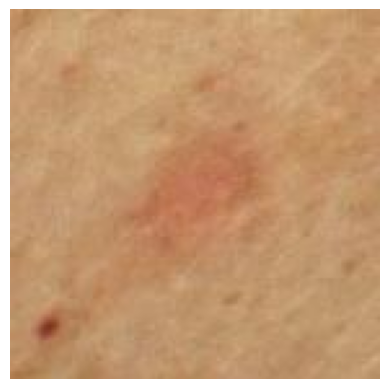

In [33]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread('/kaggle/input/isic-2024-challenge/train-image/image/ISIC_9941636.jpg')

# Convert the image from BGR (OpenCV default) to RGB (Matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Hide the axis
plt.show()

In [66]:
def showImages(image_paths,images_per_column=5):
# Number of images per column

    # Calculate the number of rows required
    num_columns = len(image_paths) // images_per_column + (len(image_paths) % images_per_column != 0)

    # Create a figure for the grid
    fig, axs = plt.subplots(num_columns, images_per_column, figsize=(25, 15))

    # Flatten the axis array for easy iteration (if there's more than one column)
    axs = axs.flatten()

    # Loop through the images and display them
    for i, image_path in enumerate(image_paths):
        # Load the image using OpenCV
        image = cv2.imread(f"/kaggle/input/isic-2024-challenge/train-image/image/{image_path}.jpg")

        # Convert the image from BGR (OpenCV default) to RGB (Matplotlib)
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Display the image in the grid
        axs[i].imshow(image_rgb)
        axs[i].set_title(image_path, fontsize=8)
        axs[i].axis('off')  # Hide the axes

    # Hide any unused subplots
    for j in range(i + 1, len(axs)):
        axs[j].axis('off')

    # Show the grid of images
    plt.tight_layout()
    plt.show()

In [62]:
malignant_images = df[df['target'] == 1]['isic_id'].tail(50).tolist()

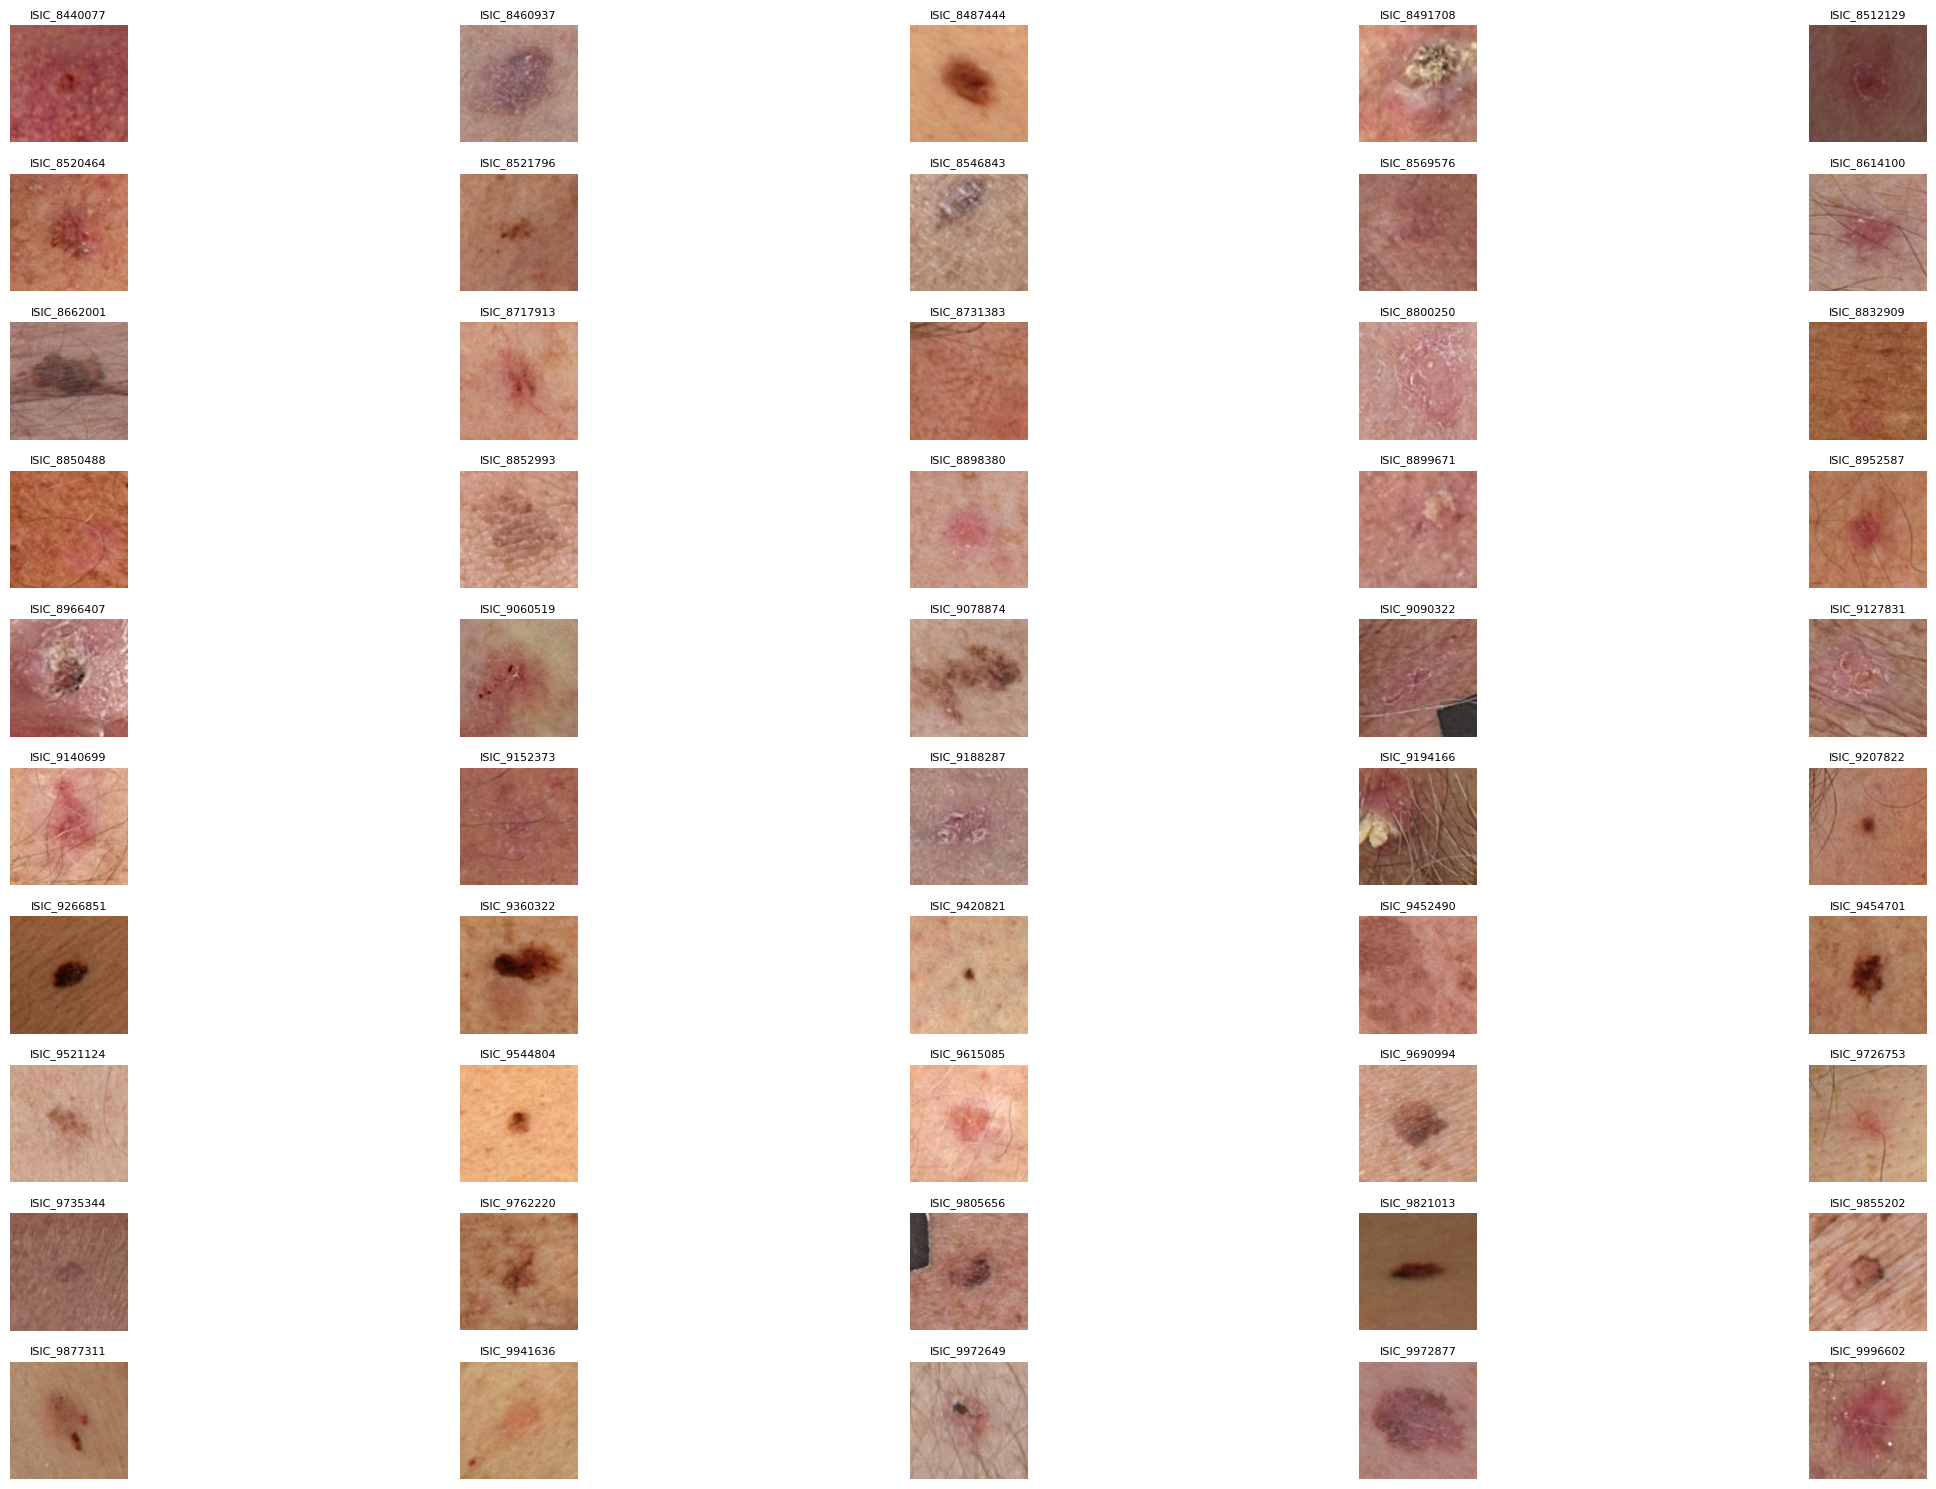

In [67]:
showImages(malignant_images)

In [57]:
pd.set_option('display.max_rows', None)       # Show all rows
pd.set_option('display.max_columns', None)    # Show all columns
pd.set_option('display.max_colwidth', None)   # Show full width of each column

In [71]:
df[(df['target'] == 1) & (df['isic_id']== "ISIC_8491708")]

,isic_id,target,patient_id,age_approx,sex,anatom_site_general,clin_size_long_diam_mm,image_type,tbp_tile_type,tbp_lv_A,tbp_lv_Aext,tbp_lv_B,tbp_lv_Bext,tbp_lv_C,tbp_lv_Cext,tbp_lv_H,tbp_lv_Hext,tbp_lv_L,tbp_lv_Lext,tbp_lv_areaMM2,tbp_lv_area_perim_ratio,tbp_lv_color_std_mean,tbp_lv_deltaA,tbp_lv_deltaB,tbp_lv_deltaL,tbp_lv_deltaLB,tbp_lv_deltaLBnorm,tbp_lv_eccentricity,tbp_lv_location,tbp_lv_location_simple,tbp_lv_minorAxisMM,tbp_lv_nevi_confidence,tbp_lv_norm_border,tbp_lv_norm_color,tbp_lv_perimeterMM,tbp_lv_radial_color_std_max,tbp_lv_stdL,tbp_lv_stdLExt,tbp_lv_symm_2axis,tbp_lv_symm_2axis_angle,tbp_lv_x,tbp_lv_y,tbp_lv_z,attribution,copyright_license,lesion_id,iddx_full,iddx_1,iddx_2,iddx_3,iddx_4,iddx_5,mel_mitotic_index,mel_thick_mm,tbp_lv_dnn_lesion_confidence
339771,ISIC_8491708,1,IP_3343426,80.0,female,upper extremity,1.23,TBP tile: close-up,3D: XP,17.393872,10.909735,22.63606,21.193436,28.547119,23.836612,52.460809,62.761969,38.7167,49.845163,1.050854,11.134446,0.0,6.484137,1.442624,-11.128463,11.389977,9.440142,0.517549,Left Arm - Lower,Left Arm,0.958904,0.34241,2.554278,0.0,3.420625,0.0,1.835056,4.330925,0.344828,155,-291.624207,910.05481,-141.209076,"Department of Dermatology, Hospital Clínic de Barcelona",CC-BY-NC,IL_9097741,"Malignant::Malignant epidermal proliferations::Squamous cell carcinoma, Invasive",Malignant,Malignant epidermal proliferations,"Squamous cell carcinoma, Invasive",NaN,NaN,NaN,NaN,52.919561


In [73]:
print_numerical_var_details(df[df['target'] == 1])

Column: target
  Type: int64
  Min: 1
  Max: 1
  Range: 0

Column: age_approx
  Type: float64
  Min: 20.0
  Max: 85.0
  Range: 65.0

Column: clin_size_long_diam_mm
  Type: float64
  Min: 1.01
  Max: 18.94
  Range: 17.93

Column: tbp_lv_A
  Type: float64
  Min: 4.97173609928277
  Max: 43.71767
  Range: 38.745933900717226

Column: tbp_lv_Aext
  Type: float64
  Min: 4.82673728646168
  Max: 35.86719
  Range: 31.040452713538322

Column: tbp_lv_B
  Type: float64
  Min: 2.87090682531998
  Max: 44.6254606141219
  Range: 41.75455378880192

Column: tbp_lv_Bext
  Type: float64
  Min: 12.63714
  Max: 42.7182640268645
  Range: 30.0811240268645

Column: tbp_lv_C
  Type: float64
  Min: 7.71566723018107
  Max: 53.5693879660156
  Range: 45.85372073583453

Column: tbp_lv_Cext
  Type: float64
  Min: 17.3816033775081
  Max: 47.2633488957824
  Range: 29.8817455182743

Column: tbp_lv_H
  Type: float64
  Min: 7.17466612020466
  Max: 65.25869
  Range: 58.08402387979534

Column: tbp_lv_Hext
  Type: float64
  M

In [81]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])

In [82]:
numeric_columns

KeyboardInterrupt: 

/opt/conda/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4781: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))


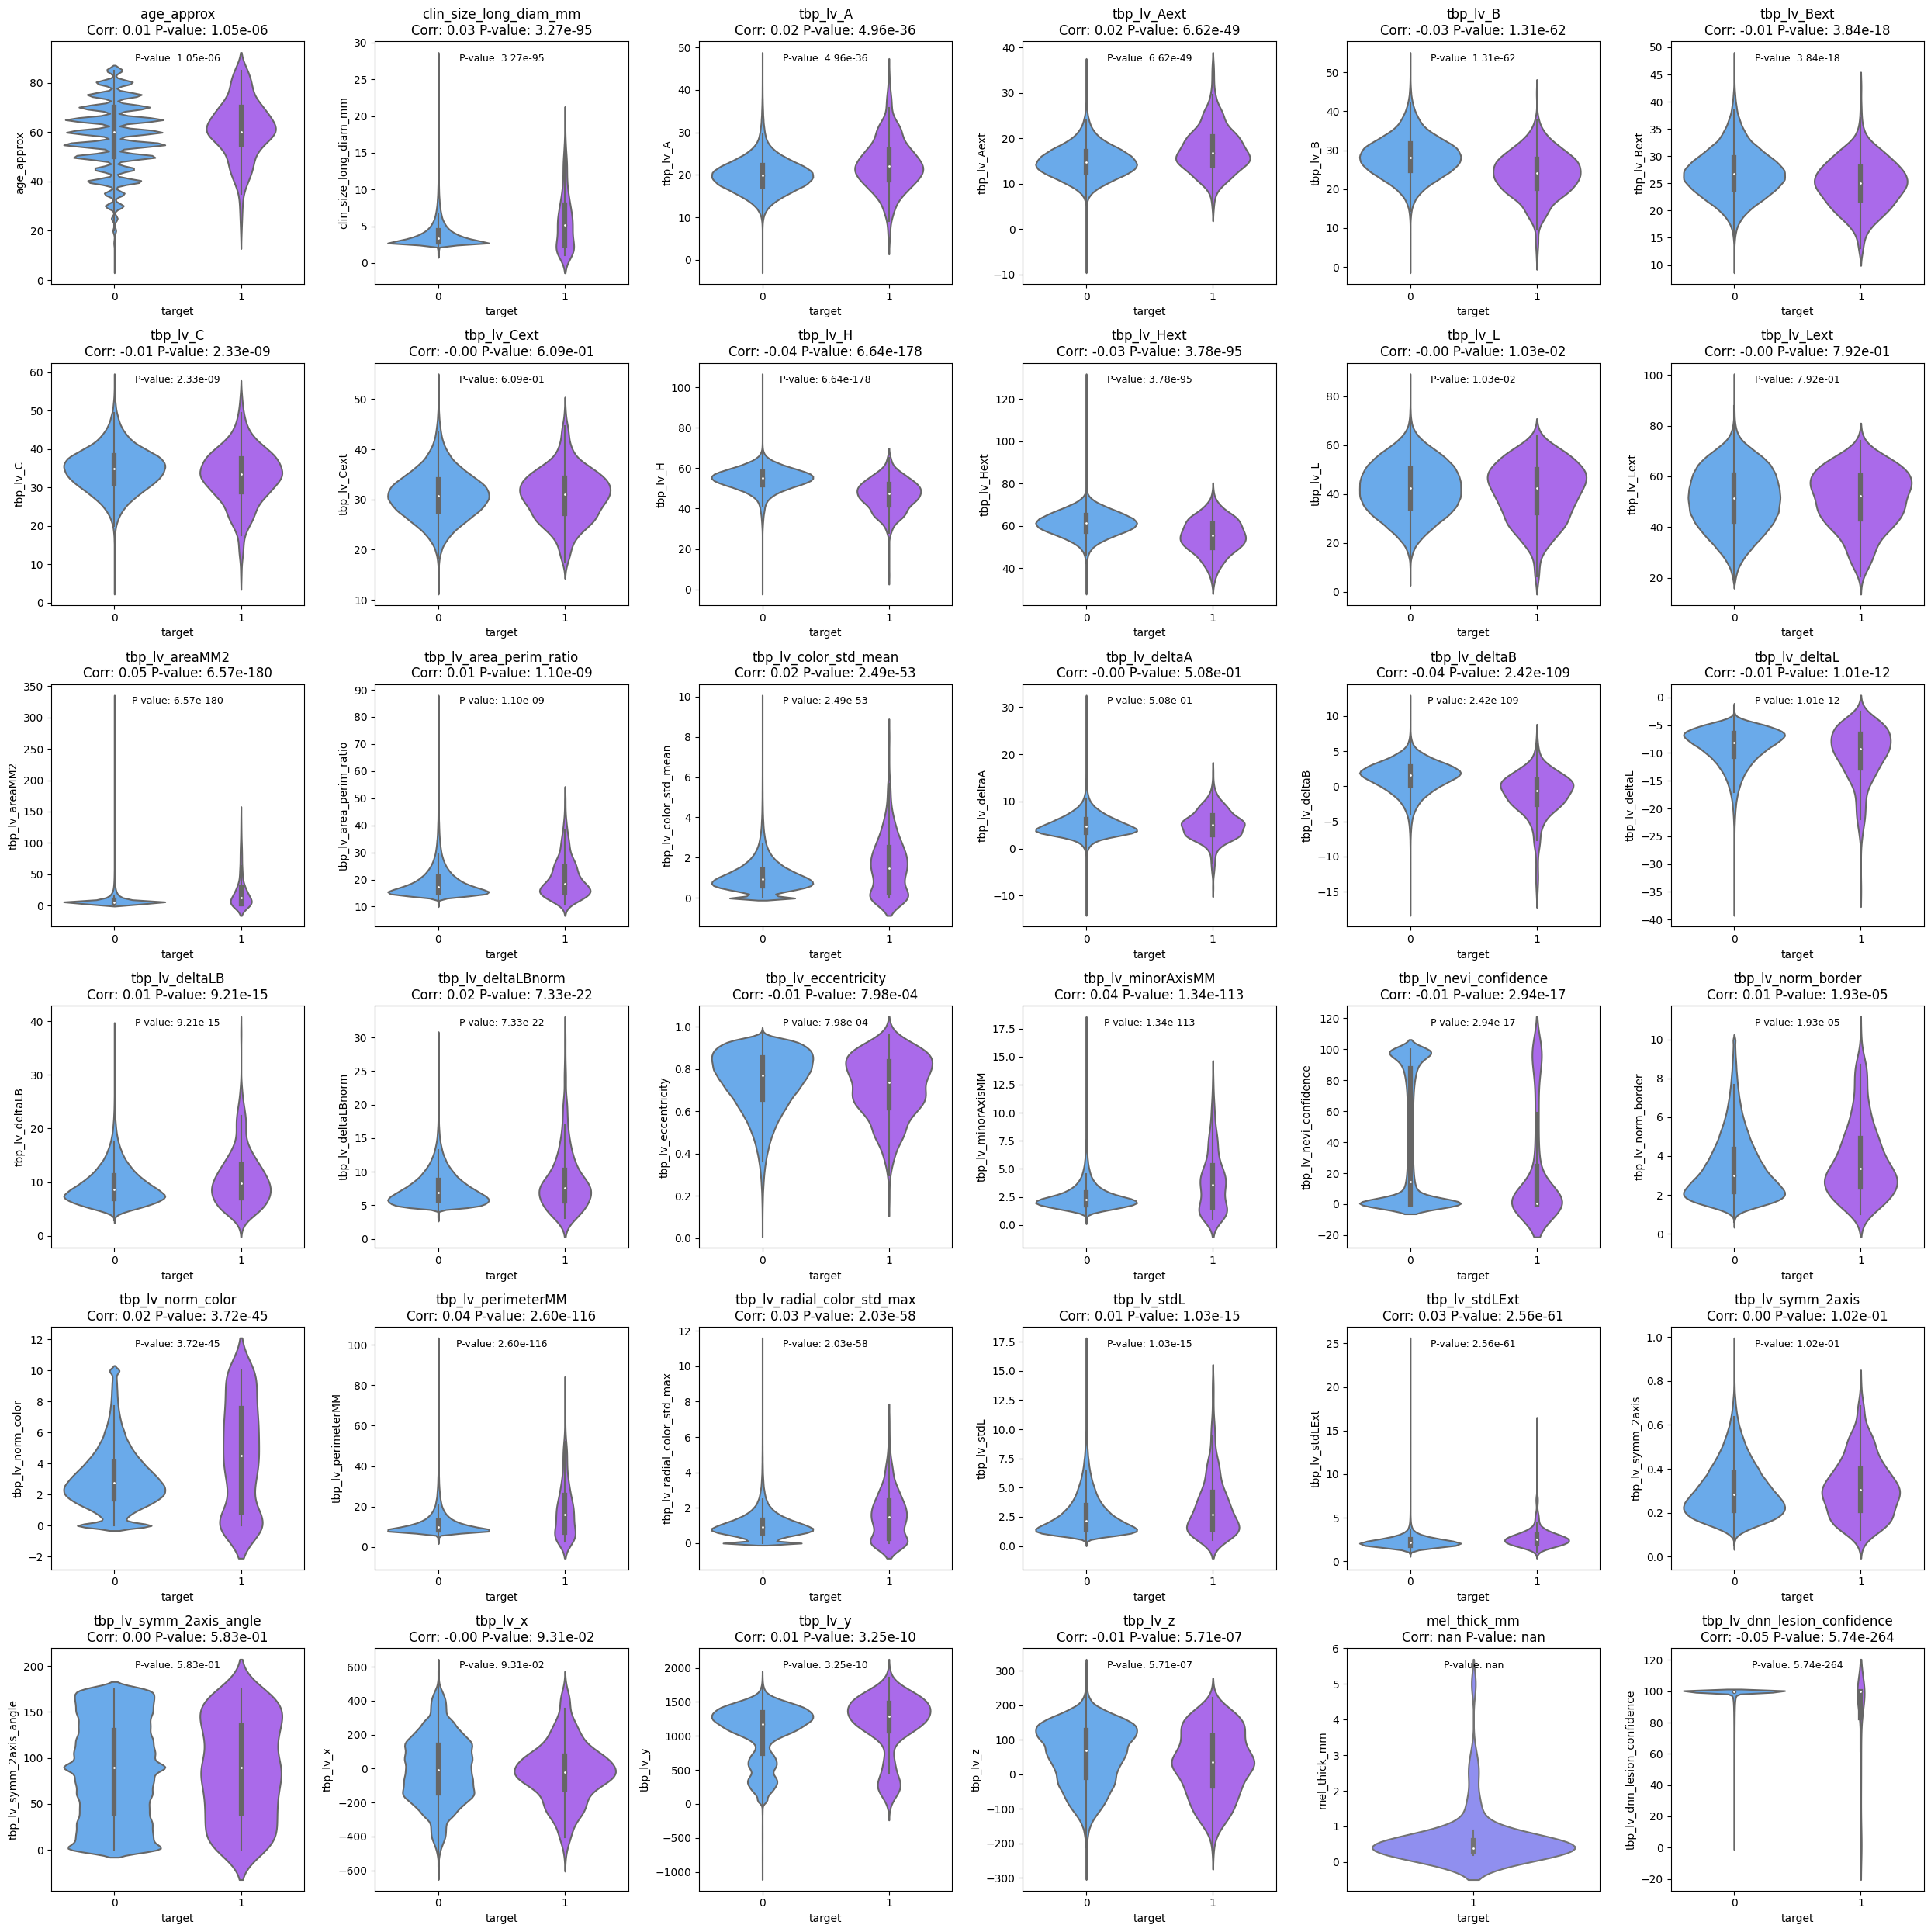

In [87]:
fig, axes = plt.subplots(6, 6, figsize=(25, 25))

for idx, column in enumerate(numeric_columns.columns[1:]):
    # Crear un nuevo DataFrame eliminando los valores nulos para la columna actual y 'target'
    df_temp = df[['target', column]].dropna()
    
    correlation, p_value = pointbiserialr( df_temp[column],df_temp['target'])
    
    ax = axes[idx // 6, idx % 6]
    
    sns.violinplot(x='target', y=column, data=df_temp, ax=ax, palette="cool")
    
    ax.set_title(f'{column}\nCorr: {correlation:.2f} P-value: {p_value:.2e}')
    
    ax.annotate(f'P-value: {p_value:.2e}', xy=(0.5, 0.95), xycoords='axes fraction', ha='center', va='top', fontsize=9, color='black')

# Ajustar el layout para que los gráficos no se solapen
plt.tight_layout()
plt.show()